In [5]:
source("../../BrusselSprouts/scripts/functions.R")
files=list.files(path = "~/data/trd/genotypes", pattern = ".mpileup-readable.txt.gz$", full.names = TRUE)
files


Attaching package: 'dplyr'


The following objects are masked from 'package:data.table':

    between, first, last


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




[1] "/home/jnrunge/data/trd/genotypes/YJNRC2.mpileup-readable.txt.gz"

In [6]:
i=1

In [9]:
data=fread(files[i])
chrs=summarise(group_by(data, chr),maxPos=max(pos))

data$global_pos=data$pos
for(c in 2:length(unique(data$chr))){
    chr=unique(data$chr)[c]
    data$global_pos[data$chr==chr]=data$pos[data$chr==chr]+sum(chrs$maxPos[chrs$chr%in%unique(data$chr)[1:(c-1)]])
}
head(data)

,chr,pos,countID1,countID2,global_pos
,<chr>,<int>,<int>,<int>,<int>
1,chromosome1,1677,0,2,1677
2,chromosome1,2068,1,1,2068
3,chromosome1,2435,3,0,2435
4,chromosome1,2447,3,0,2447
5,chromosome1,2450,3,0,2450
6,chromosome1,12361,0,2,12361


In [20]:
chrs$global_pos=cumsum(chrs$maxPos)

chr,maxPos,global_pos
<chr>,<int>,<int>
chromosome1,228791,228791
chromosome10,741629,970420
chromosome11,665352,1635772
chromosome12,1065009,2700781
chromosome13,923809,3624590
chromosome14,782407,4406997
chromosome15,1079193,5486190
chromosome16,942550,6428740
chromosome2,809691,7238431


In [16]:
data$sumCount=data$countID1+data$countID2
data=subset(data, sumCount<=quantile(data$sumCount, 0.999))

In [8]:
library(ggplot2)

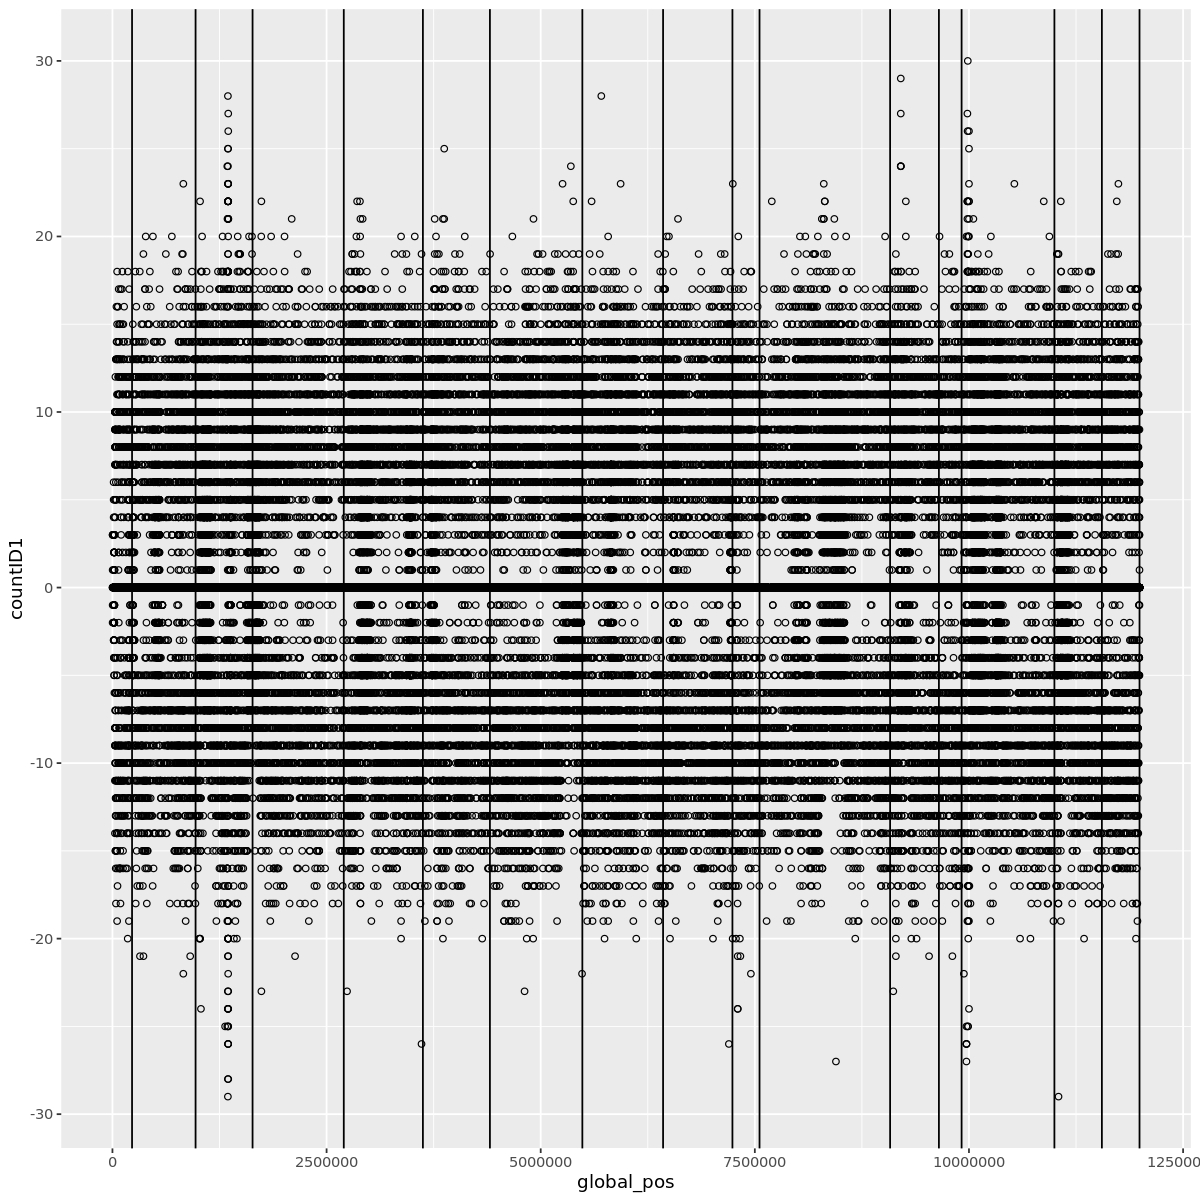

In [21]:
ggplot(data, aes(global_pos, countID1))+
geom_point(shape=1)+
geom_point(mapping=aes(global_pos, -1*countID2),shape=1)+
geom_vline(xintercept = chrs$global_pos)